<a href="https://colab.research.google.com/github/rabulhasan/data_analytics_2/blob/main/Python/Unit%204/KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Classification using Scikit-learn
**Learn K-Nearest Neighbor(KNN) Classification and build KNN classifier using Python Scikit-learn package.**

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN is used in a variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. The KNN algorithm is used for both classification and regression problems. The algorithm based on a feature similarity approach.

In this tutorial, you are going to cover the following topics:

* K-Nearest Neighbor Algorithm
* How does the KNN algorithm work?
* Eager Vs Lazy learners
* How do you decide the number of neighbors in KNN?
* Curse of Dimensionality
* Classifier Building in Scikit-learn
* Pros and Cons
* How to improve KNN performance?
* Conclusion

## K-Nearest Neighbors

![](graphics/K-Nearest.png)

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data is used in the testing phase. This makes training faster and the testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

## How does the KNN algorithm work?

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.


![](graphics/Knn_k1.png)

Suppose P1 is the point, for which a label needs to be predicted. First, you find the k closest points to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

1. Calculate distance
2. Find closest neighbors
3. Vote for labels


![](graphics/KNN_final1.png)

## Eager Vs. Lazy Learners

Eager learners mean when given training points will construct a generalized model before performing prediction on given new points to classify. You can think of such learners as being ready, active and eager to classify unobserved data points.

Lazy Learning means there is no need for learning or training of the model and all of the data points used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. A lazy learner merely stores the training dataset and waits until classification needs to perform. Only when it sees the test tuple does it perform generalization to classify the tuple based on its similarity to the stored training tuples. Unlike eager learning methods, lazy learners do less work in the training phase and more work in the testing phase to make a classification. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

## Curse of Dimensionality

KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimension Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

## How do you decide the number of neighbors in KNN?

Now, you understand the KNN algorithm working mechanism. At this point, the question arises that How to choose the optimal number of neighbors? And what are its effects on the classifier? The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.

Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.

Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance. You can also try Elbow method here.


![](graphics/KNN_final.png)

## Classifier Building in Scikit-learn

### KNN Classifier

#### Defining dataset

Let's first create your own dataset. Here you need two kinds of attributes or columns in your data: Feature and label. The reason for two type of column is "supervised nature of KNN algorithm".


In [88]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In this dataset, you have two features (weather and temperature) and one label(play).

#### Encoding data columns

Various machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Overcast:0, Rainy:1, and Sunny:2.

This process is known as label encoding, and sklearn conveniently will do this for you using Label Encoder.


In [89]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


Here, you imported preprocessing module and created Label Encoder object.
Using this LabelEncoder object, you can fit and transform "weather" column into the numeric column.

Similarly, you can encode temperature and label into numeric columns.


In [90]:
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

#### Combining Features

Here, you will combine multiple columns or features into a single set of data using "zip" function


In [91]:
#combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

#### Generating Model

Let's build KNN classifier model.

First, import the KNeighborsClassifier module and create KNN classifier object by passing argument number of neighbors in KNeighborsClassifier() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().


In [92]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print(predicted)

[1]


In the above example, you have given input [0,2], where 0 means Overcast weather and 2 means Mild temperature. Model predicts [1], which means play.

### KNN with Multiple Labels

Till now, you have learned How to create KNN classifier for two in python using scikit-learn. Now you will learn about KNN with multiple classes.

In the model the building part, you can use the wine dataset, which is a very famous multi-class classification problem.
This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The dataset comprises 13 features ('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline') and a target (type of cultivars).

This data has three types of cultivar classes: 'class_0', 'class_1', and 'class_2'. Here, you can build a model to classify the type of cultivar. The dataset is available in the scikit-learn library, or you can also download it from the UCI Machine Learning Library.

#### Loading Data

Let's first load the required wine dataset from scikit-learn datasets.


In [93]:
import numpy as np
import pandas as pd
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [94]:
wine = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
columns=wine['feature_names'] + ['target'])

#### Exploring Data

After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names.  


In [95]:
# print the names of the features
print(wine.target)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
173    2.0
174    2.0
175    2.0
176    2.0
177    2.0
Name: target, Length: 178, dtype: float64


In [96]:
wine.shape



(178, 14)

Let's check top 5 records of the feature set.


In [97]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


Let's check records of the target set.


In [98]:
# print the wine labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
173    2.0
174    2.0
175    2.0
176    2.0
177    2.0
Name: target, Length: 178, dtype: float64


Let's explore it for a bit more. You can also check the shape of the dataset using shape.


Normalize

In [99]:
# print target(or label)shape
print(wine.target.shape)

(178,)


<h1>Quastions</h>

Show the displot plot of data before scaling it.Use:

1.   sns.distplot( ad_data["col_name1"] , color="skyblue")

2.   Standardization  of data ,Standarize the data using :

# Using StandardScaler library
from sklearn.preprocessing import StandardScaler
# define scaler
scalar = StandardScaler()
#fit() calculates the parameters (𝜇,std,var) when StandardScaler used

scalar.fit()

and  transform data
scaled_features = scalar.transform


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


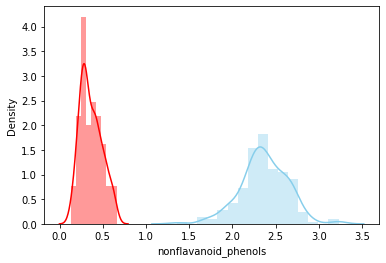

In [100]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

sns.distplot( wine["ash"] , color="skyblue")
sns.distplot( wine["nonflavanoid_phenols"] , color="red")


In [101]:
# Using StandardScaler library
from sklearn.preprocessing import StandardScaler

In [102]:
# define scaler
scalar = StandardScaler()

In [103]:
# fit and transform the data

scalar.fit(wine)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [104]:

scaled_features = scalar.transform(wine)


In [105]:
sc_df = pd.DataFrame(scaled_features)
sc_df.rename({0: 'alcohol', 1: 'malic_acid', 2:'ash', 3: 'alcalinity_of_ash', 4: 'magnesium', 5: 'total_phenols', 
6:'flavanoids' ,7: 'nonflavanoid_phenols',8:'proanthocyanins',9: 'color_intensity', 10:'hue',11:'od280 od315_of_diluted_wines', 12: 'proline', 13:'target'}, axis=1, inplace=True)	

sc_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280 od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


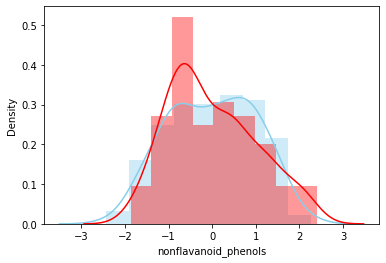

In [106]:
sns.distplot( sc_df['alcohol'] , color="skyblue")
sns.distplot( sc_df['nonflavanoid_phenols'] , color="red")

#### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.


In [107]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine, wine.target, test_size=0.3) # 70% training and 30% test

#### Generating Model for K=5

Let's build KNN classifier model for k=5.


In [108]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#### Model Evaluation for k=5

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.


In [109]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


Well, you got a classification rate of 61.11%, considered as good accuracy.

For further evaluation, you can also create a model for a different number of neighbors.

#### Re-generating Model for K=2

Let's build KNN classifier model for k=2.


In [110]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#### Model Evaluation for k=2

Let's again estimate, how accurately the classifier or model can predict the type of cultivars for k=2.


In [111]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6851851851851852


Well, you got a classification rate of 68.51%, considered as good accuracy.

Here, you have increased the number of neighbors in the model and accuracy got increased. But, this is not necessary for each case that an increase in many neighbors increases the accuracy. For a more detailed understanding of it, you can refer section "How to decide the number of neighbors?" of this tutorial.

## Pros

The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

## Cons

The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

## How to improve KNN?

For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.



for the values of K=1 TO 40 PLOT the Testing Accuracy' vs K value

1.   PLOT the Testing Accuracy' vs value of K 
2.   Plot Errorrate vs value of K



In [112]:
from sklearn import metrics

In [113]:
scr =[]
# Run for k from 1 to 39
# Pssing the value of K to KNeighborsClassifier
# and calculating the acuracy score (y_test vs y_predect)
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scr.append(metrics.accuracy_score(y_test,y_pred))#append() appends a passed obj (matrics.accuracy) into the existing list.(score)

print(scr)

[0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.6296296296296297, 0.6666666666666666, 0.7037037037037037, 0.6481481481481481, 0.6296296296296297, 0.6111111111111112, 0.6111111111111112, 0.5925925925925926, 0.6111111111111112, 0.6111111111111112, 0.6296296296296297, 0.6111111111111112, 0.6481481481481481, 0.6481481481481481, 0.6666666666666666, 0.6666666666666666, 0.7037037037037037, 0.6111111111111112, 0.7037037037037037, 0.6851851851851852, 0.6851851851851852, 0.7037037037037037, 0.7037037037037037, 0.7037037037037037, 0.6666666666666666, 0.6851851851851852, 0.6851851851851852, 0.7037037037037037, 0.7037037037037037, 0.7037037037037037, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.7037037037037037, 0.7037037037037037, 0.7037037037037037]


Text(0, 0.5, 'Testing Accuracy')

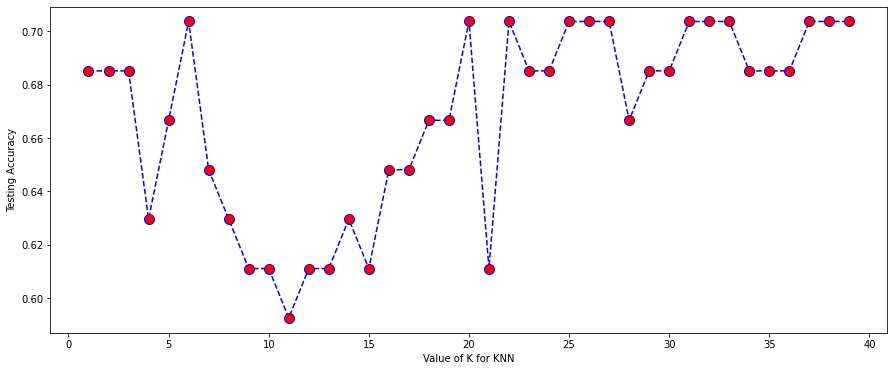

In [114]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),scr, color='blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#Error rate

In [115]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))#will return the fraction 
    #of those results who failed to match the test - hence your error.
    #Note that != will return True for those that do not match the test values because you are interested in error.

Minimum error:- 0.2962962962962963 at K = 5
Maximum error:- 0.4074074074074074 at K = 10


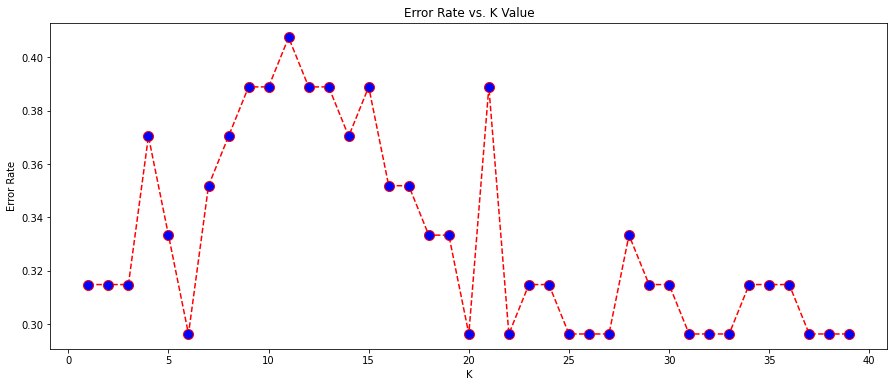

In [116]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
print("Maximum error:-",max(error_rate),"at K =",error_rate.index(max(error_rate)))

## Conclusion
* for the first time run I get minimum error rate of 14. thats means if I take k value of 14 i will get most accurate result. However, each time I rerun I get differnt value.

* The accuracy will be differ each time I run the code. But be carefull with the scr list, when you append anything in the list it will get bigger and you possiblly get and non-match error at the end. to skip the error you have to keep change the list name variable such as change name scr to anything else. 



In this tutorial, you have learned the K-Nearest Neighbor algorithm; it's working, eager and lazy learner, the curse of dimensionality, model building and evaluation on wine dataset using Python Scikit-learn package. Also, discussed its advantages, disadvantages, and performance improvement suggestions.

I look forward to hearing any feedback or questions. You can ask questions by leaving a comment, and I will try my best to answer it.